# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.io as pio
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
try:
    d0 = pd.read_csv('/datasets/geo_data_0.csv')
except:     
    d0 = pd.read_csv('D:/Рабочий стол/япроект/geo_data_0.csv')

In [3]:
d0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
d0.duplicated().sum()

0

In [5]:
try:
    d1 = pd.read_csv('/datasets/geo_data_1.csv')
except:     
    d1 = pd.read_csv('D:/Рабочий стол/япроект/geo_data_1.csv')

In [6]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
d1.duplicated().sum()

0

In [8]:
try:
    d2 = pd.read_csv('/datasets/geo_data_2.csv')
except:     
    d2 = pd.read_csv('D:/Рабочий стол/япроект/geo_data_2.csv')

In [9]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
d2.duplicated().sum()

0

In [11]:
d0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [12]:
d0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [13]:
d1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [14]:
d2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Данные без пропускова и дубликатов.
Все признаки числовые, категориальных нет. Отделим признаки от целевого и разобъем выборки:

In [15]:
target_0 = d0['product']
features_0 = d0.drop(['id', 'product'], axis=1)



features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345)


target_1 = d1['product']
features_1 = d1.drop(['id', 'product'], axis=1)
 
    

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)


target_2 = d2['product']
features_2 = d2.drop(['id', 'product'], axis=1)


features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

In [16]:
d0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


## Обучение и проверка модели

### Скважины региона 1

In [17]:
def modeling(features, target, features_train, target_train, features_valid, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    print('Оценка модели: ', model.score(features_valid, target_valid))
    scores = cross_val_score(model, features, target)
    print('Средняя оценка кросс-валидации: ', scores.mean())
    prediction = model.predict(features_valid)
    pm = prediction.mean()
    rmse = mean_squared_error(target_valid, prediction) ** 0.5
    print('Предсказание модели в диапазоне rmse: ', pm, '+-', rmse)
    print('Реальное среднее: ', target_valid.mean())

In [18]:
modeling(features_0, target_0, features_train_0, target_train_0, features_valid_0, target_valid_0)

Оценка модели:  0.27994321524487786
Средняя оценка кросс-валидации:  0.27549130726904475
Предсказание модели в диапазоне rmse:  92.59256778438035 +- 37.5794217150813
Реальное среднее:  92.07859674082927


Кросс-валидация показала, что реальная точность модели чуть хуже

В среднем, предсказание модели оказалось очень точным

### Скважины региона  2

In [19]:
modeling(features_1, target_1, features_train_1, target_train_1, features_valid_1, target_valid_1)

Оценка модели:  0.9996233978805127
Средняя оценка кросс-валидации:  0.9996243728923553
Предсказание модели в диапазоне rmse:  68.72854689544602 +- 0.8930992867756165
Реальное среднее:  68.72313602435997


Удивительно высокая точность предсказания, даже не смотря на кросс-валидацию

Запасы этой скважины предсказаны точно, при этом их объем меньше, чем у предыдущей скважины

### Скважины региона  3

In [20]:
modeling(features_2, target_2, features_train_2, target_train_2, features_valid_2, target_valid_2)

Оценка модели:  0.20524758386040443
Средняя оценка кросс-валидации:  0.19871562462051284
Предсказание модели в диапазоне rmse:  94.96504596800489 +- 40.02970873393434
Реальное среднее:  94.88423280885438


Очень плохая предсказуемость модели

Объем и разброс предсказания запасов этой скважины почти такие же, как у первой

## Подготовка к расчёту прибыли

In [27]:
MIN_BARR_COUNT = 10000000 / ( 450 * 200 )

Минимальное значение для окупаемости около 111 тыс. баррелей, что выше среднего для всех регионов

In [22]:
def profit(target, probabilities, count):
    target = target.reset_index(drop = True)
    probabilities = probabilities.reset_index(drop = True)
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return 450 * selected.sum() - 10000000

In [23]:
def calc(target, features_valid, features_train, target_train):
    model = LinearRegression()
    model.fit(features_train, target_train)
    target = target.reset_index(drop=True)
    probabilities = pd.Series(model.predict(features_valid))
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        probs_subsample = probabilities[target_subsample.index]
        values.append(profit(target_subsample, probs_subsample, 200))

    fig = go.Figure()
    fig.add_trace(go.Box(y=values, name='Распределение прибыли'))
    fig.show("svg")        
    values = pd.Series(values)
    loss_proba = values[values < 0].count() / values.count()
    lower = values.quantile(q=0.025)
    upper = values.quantile(q=0.975)

    mean = values.mean()
    print("Средняя выручка:", '{:.1f}'.format(mean/1000), 'млрд')
    print("5%-квантиль:", '{:.1f}'.format(lower/1000), 'млрд')
    print("95%-квантиль:", '{:.1f}'.format(upper/1000), 'млрд')
    print("Вероятность убытков:", '{:.1f}'.format(loss_proba * 100), '%')


## Расчёт прибыли и рисков 

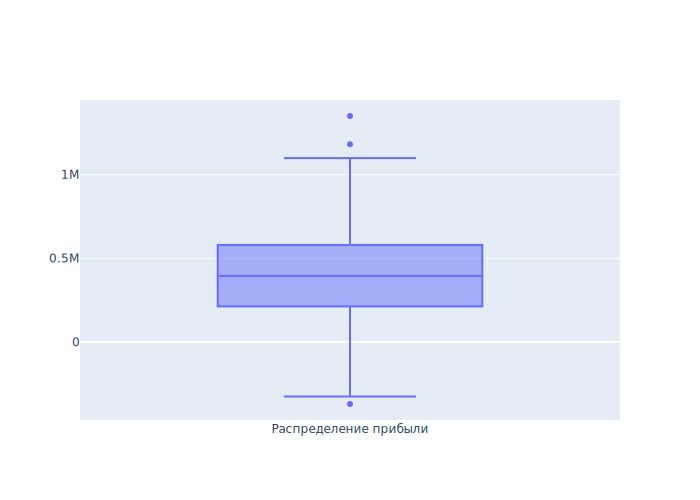

Средняя выручка: 396.2 млрд
5%-квантиль: -111.2 млрд
95%-квантиль: 909.8 млрд
Вероятность убытков: 6.9 %


In [24]:
calc(target_valid_0, features_valid_0, features_train_0, target_train_0)

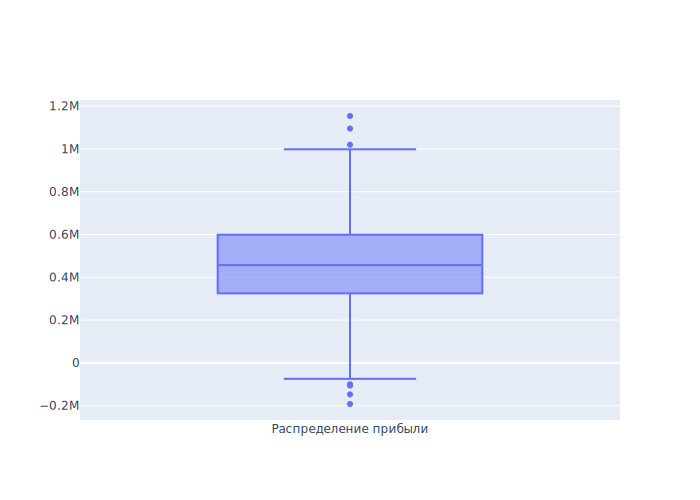

Средняя выручка: 456.0 млрд
5%-квантиль: 33.8 млрд
95%-квантиль: 852.3 млрд
Вероятность убытков: 1.5 %


In [25]:
calc(target_valid_1, features_valid_1, features_train_1, target_train_1)

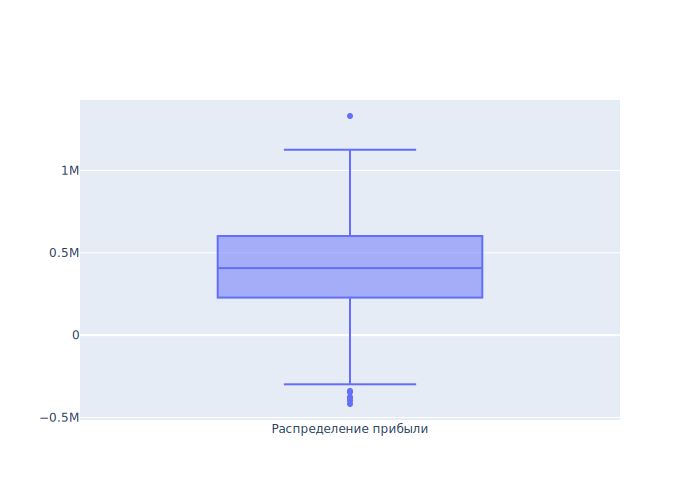

Средняя выручка: 404.4 млрд
5%-квантиль: -163.4 млрд
95%-квантиль: 950.4 млрд
Вероятность убытков: 7.6 %


In [26]:
calc(target_valid_2, features_valid_2, features_train_2, target_train_2)

Единственный подходящий регион под номером 1

## Вывод

Цель работы -- определение региона с наибольшей прибылью и наименьшими рисками. \
\
В исходных данных имелось три региона под номерами 0, 1 и 2. Для каждого была создана модель линейной регрессии, предсказывающая количество баррелей в скажине по ее параметрам. \
Самым предсказуемым оказался регион под номером 1. Высокая точность модели позволяет лучше всего оценить реальные запасы в скважинах. При этом в данном регионе средние объемы залежей меньше, чем в остальных.\
\
Было проиведено моделирование выбора лучших 200 скважин из 500 отобраных случайным образом. Результаты исследования показали: хоть регионы 0 и 2 потенциально могут принести большую прибыль (95% квантиль), они слишком непредсказуемы, и вероятность убытков в них велика. Только 1 регион имеет достаточно низкую вероятность убытков -- всего 1.5%. Именно он рекомендуется к выбору.
